# Analyze the Amazon Alexa dataset and build word cloud for the sentiment of a given input sentence is positive or negative.

In [21]:
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv(r"amazon_alexa.tsv", sep='\t', encoding='utf-8')

print(f"Dataset shape : {df.shape}")

Dataset shape : (3150, 5)


In [23]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [24]:
print(f"Feedback value count: \n{df['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     257
Name: count, dtype: int64


In [25]:
# Remove stopwords
stop_words = set(stopwords.words('english'))

In [26]:
# Preprocess positive reviews
positive_reviews = ' '.join([review.encode('utf-8').decode('ascii', 'ignore') for review in df[df['feedback'] == 1]['verified_reviews']
                             .astype(str).str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))])

In [27]:
# Print the processed review texts
print("Positive reviews after stop word removal:")
print(positive_reviews)

Positive reviews after stop word removal:
love echo! loved it! sometimes playing game, answer question correctly alexa says got wrong answers you. like able turn lights away home. lot fun thing. 4 yr old learns dinosaurs, control lights play games like categories. nice sound playing music well. music received echo gift. needed another bluetooth something play music easily accessible, found smart speaker. cant wait see else do. without cellphone, cannot use many features. ipad see use. great alarm. u r almost deaf, hear alarm bedroom living room, reason enough keep her.it fun ask random questions hear response. seem smartbon politics yet. think 5th one i've purchased. i'm working getting one every room house. really like features offer specifily playing music echos controlling lights throughout house. looks great love it! ive listened songs havent heard since childhood! get news, weather, information! its great! sent 85 year old dad, talks constantly. love it! learning knew things eveyd

In [28]:
# Preprocess negative reviews
negative_reviews = ' '.join([review.encode('utf-8').decode('ascii', 'ignore') for review in df[df['feedback'] == 0]['verified_reviews']
                             .astype(str).str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))])

In [29]:
print("Negative reviews after stop word removal:")
print(negative_reviews)

Negative reviews after stop word removal:
like siri, fact, siri answers accurately alexa. see real need household, though good bargain prime day deals. sound terrible u want good music get bose much features. stopped working 2 weeks ,didn't follow commands!? really fun working? sad joke. worthless. really disappointed alexa plug-in wall socket time. fault checking this, made assumption company technologically advanced amazon would sell product rechargeable battery. could return it, would apple music boom speaker give flexibility alexa. got great sound bass work time. still hot miss recognizes things super impressed alexa. prime lapsed, play anything. smart enough differentiate among spotify accounts can't use either. randomly speaks nobody talking her. today unplugged her...not sure i'll ever use alexa again. difficult set up. keeps timing enter password alexa hardly came on.. item longer works 5 months use. connect wifi unresponsive reset requests. thing barely works. select 3rd party

Text(0.5, 1.0, 'Positive Feedback')

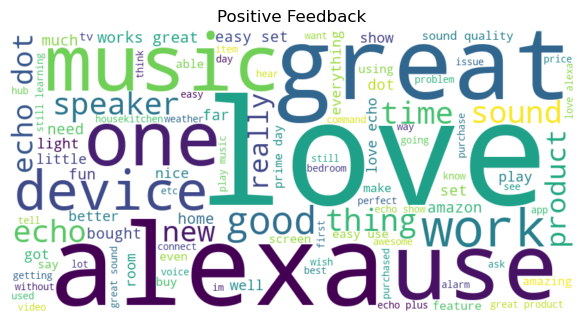

In [30]:
positive_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(positive_reviews)

#matplotlib plotting
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Feedback')

Text(0.5, 1.0, 'Negative Feedback')

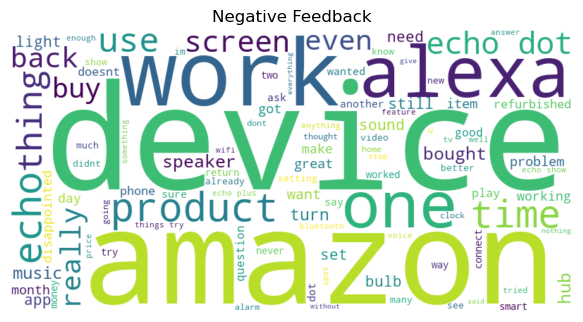

In [31]:
negative_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(negative_reviews)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Feedback')